In [1]:
# Author: Arthur Prigent
# Email: aprigent@ictp.it

In [2]:
from load_librairies import *
from scipy.stats.stats import pearsonr
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
import cartopy

def nandetrend(y):
    ''' Remove the linear trend from the data '''
    
    x = np.arange(0,y.shape[0],1)
    m, b, r_val, p_val, std_err = stats.linregress(x,np.array(y))
    y_detrended= np.array(y) - m*x
    return y_detrended


def is_mjj(month):
    return (month>=5) & (month<=7)


dir_proj = '/home/netapp-clima-users/users/aprigent/Projects/TAV_OMIP/'
path_fig = dir_proj+'/figures_final/'

dir_forcing = '/home/clima-archive2/rfarneti/INPUT_DATA/JRA55-do-1-5-0/'
dir_tos_omip1 = '/home/netapp-clima-users/users/aprigent/CMIP6/ocean/omip1/tos/mon/'
dir_tos_omip2 = '/home/netapp-clima-users/users/aprigent/CMIP6/ocean/omip2/tos/mon/'
#dir_obs_sst = '/home/netapp-clima-users/users/aprigent/Observations/HadI-SST/'
dir_obs_sst = '/home/netapp-clima-users/users/aprigent/Observations/'
path_data_out = '/media/aprigent/Arthur_disk/data_uncertainty/'

period_str = 1985
period_end = 2004

%matplotlib inline

/tmp/ipykernel_21863/3731587110.py:2: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


# Load MOM JRA55

In [3]:
ssta_mom_atl = xr.open_dataset(path_data_out+'tos_mom_atl_1985_2004.nc')




In [4]:
ssta_eq_mom_mjj_atl = ssta_mom_atl.tosa_atl.sel(time=is_mjj(
    ssta_mom_atl.tosa_atl['time.month'])).groupby('time.year').mean()
std_ssta_eq_mom_mjj_atl = np.sqrt(ssta_eq_mom_mjj_atl.var(dim='year'))

In [5]:
thetao_eq_mom = xr.open_dataset(path_data_out+'temp_mom_JRA55_eq_1985_2004.nc')
dtdz_eq_mom = xr.open_dataset(path_data_out+'dtdz_mom_eq_1985_2004_newtest.nc')
mld_eq_mom = xr.open_dataset(path_data_out+'mld_mom_JRA55_eq_1985_2004.nc')



mld_eq_mom_jja = mld_eq_mom.mld.sel(time=is_mjj(mld_eq_mom.mld['time.month'])).mean(dim='time')
dtdz_eq_mom_jja = dtdz_eq_mom.dtdz_max.sel(time=is_mjj(dtdz_eq_mom.dtdz_max['time.month'])).mean(dim='time')
thetao_eq_mom_jja = thetao_eq_mom.tempa.sel(time=is_mjj(thetao_eq_mom.tempa['time.month']))
std_thetao_eq_mom_jja = thetao_eq_mom_jja.groupby('time.year').mean().std(dim='year')


# Load MOM JRA55 with CORE-II winds

In [6]:
ssta_momcore2_atl = xr.open_dataset(path_data_out+'tos_mom_core2_atl_1985_2004.nc')

In [7]:
ssta_eq_momcore2_mjj_atl = ssta_momcore2_atl.tosa_atl.sel(time=is_mjj(
    ssta_momcore2_atl.tosa_atl['time.month'])).groupby('time.year').mean()
std_ssta_eq_momcore2_mjj_atl = np.sqrt(ssta_eq_momcore2_mjj_atl.var(dim='year'))

In [8]:


thetao_eq_mom_core2 = xr.open_dataset(path_data_out+'temp_mom_JRA55_core2_eq_1985_2004.nc')
dtdz_eq_mom_core2 = xr.open_dataset(path_data_out+'dtdz_mom_core2_eq_1985_2004_newtest.nc')
mld_eq_mom_core2 = xr.open_dataset(path_data_out+'mld_mom_JRA55_core2_eq_1985_2004.nc')


mld_eq_mom_core2_jja = mld_eq_mom_core2.mld.sel(time=is_mjj(mld_eq_mom_core2.mld['time.month'])).mean(dim='time')
dtdz_eq_mom_core2_jja = dtdz_eq_mom_core2.dtdz_max.sel(time=is_mjj(dtdz_eq_mom_core2.dtdz_max['time.month'])).mean(dim='time')
thetao_eq_mom_core2_jja = thetao_eq_mom_core2.tempa.sel(time=is_mjj(thetao_eq_mom_core2.tempa['time.month']))
std_thetao_eq_mom_core2_jja = thetao_eq_mom_core2_jja.groupby('time.year').mean().std(dim='year')

# Load MOM-JRA55 with CORE-II heat fluxs

In [9]:
ssta_momcore2_heat_atl = xr.open_dataset(path_data_out+'tos_mom_core2_heat_atl_1985_2004.nc')

In [10]:
ssta_eq_momcore2_heat_mjj_atl = ssta_momcore2_heat_atl.tosa_atl.sel(time=is_mjj(
    ssta_momcore2_heat_atl.tosa_atl['time.month'])).groupby('time.year').mean()
std_ssta_eq_momcore2_heat_mjj_atl = np.sqrt(ssta_eq_momcore2_heat_mjj_atl.var(dim='year'))

In [11]:

thetao_eq_mom_core2_heat = xr.open_dataset(path_data_out+'temp_mom_JRA55_core2_heat_eq_1985_2004.nc')
dtdz_eq_mom_core2_heat = xr.open_dataset(path_data_out+'dtdz_mom_core2_heat_eq_1985_2004_newtest.nc')
mld_eq_mom_core2_heat = xr.open_dataset(path_data_out+'mld_mom_JRA55_core2_heat_eq_1985_2004.nc')


mld_eq_mom_core2_heat_jja = mld_eq_mom_core2_heat.mld.sel(time=is_mjj(mld_eq_mom_core2_heat.mld['time.month'])).mean(dim='time')
dtdz_eq_mom_core2_heat_jja = dtdz_eq_mom_core2_heat.dtdz_max.sel(time=is_mjj(dtdz_eq_mom_core2_heat.dtdz_max['time.month'])).mean(dim='time')
thetao_eq_mom_core2_heat_jja = thetao_eq_mom_core2_heat.tempa.sel(time=is_mjj(thetao_eq_mom_core2_heat.tempa['time.month']))
std_thetao_eq_mom_core2_heat_jja = thetao_eq_mom_core2_heat_jja.groupby('time.year').mean().std(dim='year')

In [12]:

dtdz_eq_mom_jja_atl3 = dtdz_eq_mom_jja.where((dtdz_eq_mom_jja.lon>=-20)&(dtdz_eq_mom_jja.lon<=0))
dtdz_eq_mom_core2_jja_atl3 = dtdz_eq_mom_core2_jja.where((dtdz_eq_mom_core2_jja.lon>=-20)&(dtdz_eq_mom_core2_jja.lon<=0))
dtdz_eq_mom_core2_heat_jja_atl3 = dtdz_eq_mom_core2_heat_jja.where((dtdz_eq_mom_core2_heat_jja.lon>=-20)&(dtdz_eq_mom_core2_heat_jja.lon<=0))

# Figure S10

/home/netapp-clima/users/ggiulian/m20/lib/python3.10/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/home/netapp-clima/users/ggiulian/m20/lib/python3.10/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


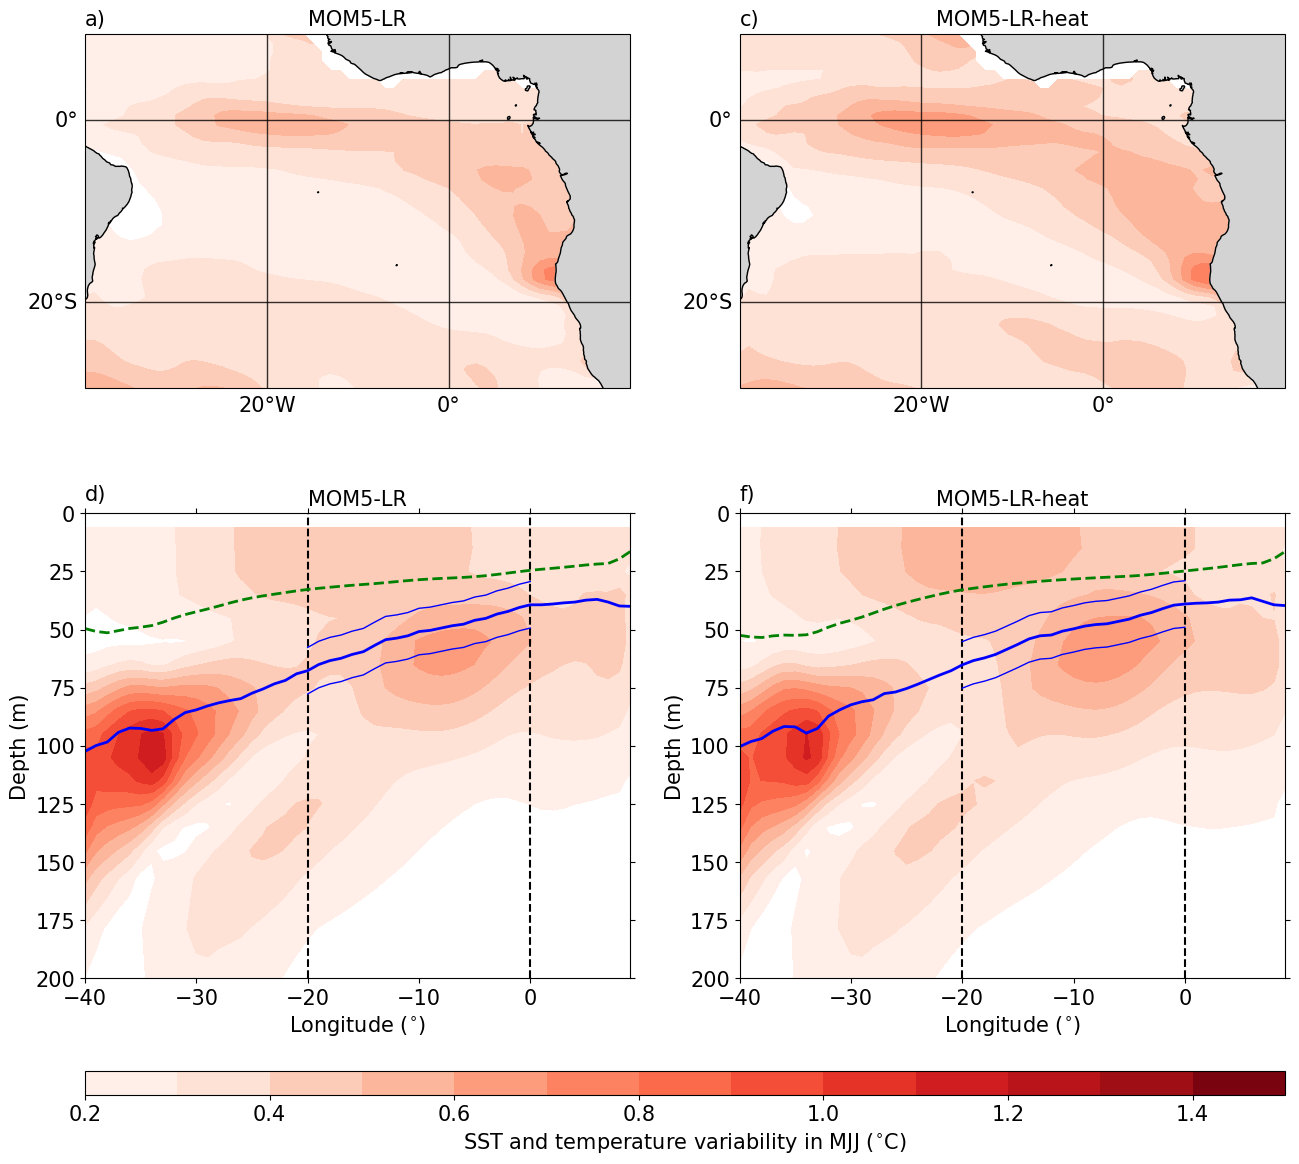

In [13]:
fig = plt.figure(figsize=[12,10])
fig.patch.set_facecolor('white')
ftz=15
gs=gridspec.GridSpec(2,2)
levels=np.arange(0.2,1.6,0.1)
cmap=plt.cm.Reds
ax0 = fig.add_subplot(gs[0,0],projection=ccrs.PlateCarree())

ax2 = fig.add_subplot(gs[0,1],projection=ccrs.PlateCarree())
ax3 = fig.add_subplot(gs[1,0])
ax5 = fig.add_subplot(gs[1,1])


plt.subplots_adjust(top=1, bottom=0, left=0, right=1, hspace=0.15, wspace=0.2)


cax0 = inset_axes(ax3,
                 width='220%',
                 height='5%',
                 loc='lower left',
                 bbox_to_anchor=(0,-0.25,1,1),
                 bbox_transform = ax3.transAxes,
                 borderpad=0)


p0 = ax0.contourf(std_ssta_eq_mom_mjj_atl.lon,std_ssta_eq_mom_mjj_atl.lat,std_ssta_eq_mom_mjj_atl,cmap= cmap,
            levels =levels,transform=ccrs.PlateCarree())

gl = ax0.gridlines(crs = ccrs.PlateCarree(),draw_labels=True,linewidth=1,color='black',alpha=0.8,linestyle='-')
gl.xlabels_top = False
gl.ylabels_right=False
gl.xlabel_style = {'size':ftz, 'color':'black'}
gl.ylabel_style = {'size':ftz, 'color':'black'}
gl.xlocator = mticker.FixedLocator([-40,-20,0])
gl.ylocator = mticker.FixedLocator([-20,0])
ax0.coastlines(linewidth=1,zorder=4)
ax0.add_feature(cartopy.feature.LAND,edgecolor='black',color='lightgrey',zorder=2)
cbar = plt.colorbar(p0,cax0,orientation='horizontal')
cbar.ax.tick_params(labelsize=ftz)
cbar.set_label('SST and temperature variability in MJJ ($^{\circ}$C)',fontsize=ftz)
ax0.set_title('MOM5-LR',fontsize=ftz)
ax0.text(0,1.04,string.ascii_lowercase[0]+')',transform=ax0.transAxes,size=ftz,        
           verticalalignment='center') 





p0 = ax2.contourf(std_ssta_eq_momcore2_heat_mjj_atl.lon,
                  std_ssta_eq_momcore2_heat_mjj_atl.lat,
                  std_ssta_eq_momcore2_heat_mjj_atl,cmap= cmap,
            levels =levels,transform=ccrs.PlateCarree())

gl = ax2.gridlines(crs = ccrs.PlateCarree(),draw_labels=True,linewidth=1,color='black',alpha=0.8,linestyle='-')
gl.xlabels_top = False
gl.ylabels_right=False
gl.xlabel_style = {'size':ftz, 'color':'black'}
gl.ylabel_style = {'size':ftz, 'color':'black'}
gl.xlocator = mticker.FixedLocator([-40,-20,0])
gl.ylocator = mticker.FixedLocator([-20,0])
ax2.coastlines(linewidth=1,zorder=4)
ax2.add_feature(cartopy.feature.LAND,edgecolor='black',color='lightgrey',zorder=2)
ax2.set_title('MOM5-LR-heat',fontsize=ftz)

ax2.text(0,1.04,string.ascii_lowercase[2]+')',transform=ax2.transAxes,size=ftz,        
           verticalalignment='center') 





p0 = ax3.contourf(std_thetao_eq_mom_jja.lon,
               std_thetao_eq_mom_jja.depth,
               std_thetao_eq_mom_jja[:,:],
               cmap=cmap,
               levels=levels,
               extend='max')
ax3.axvline(0,color='black',linestyle='--')
ax3.axvline(-20,color='black',linestyle='--')
ax3.plot(dtdz_eq_mom_jja_atl3.lon,dtdz_eq_mom_jja_atl3+10,color='blue',linewidth=1)    
ax3.plot(dtdz_eq_mom_jja_atl3.lon,dtdz_eq_mom_jja_atl3-10,color='blue',linewidth=1)
ax3.plot(dtdz_eq_mom_jja.lon,dtdz_eq_mom_jja,color='blue',linewidth=2)
ax3.plot(mld_eq_mom_jja.lon,mld_eq_mom_jja,color='green',linewidth=2,linestyle='--')
ax3.set_ylim([0,200])
ax3.set_xlim([-40,9])
ax3.set_title('MOM5-LR',fontsize=ftz)
ax3.set_ylabel('Depth (m)',fontsize=ftz)
ax3.set_xlabel('Longitude ($^{\circ}$)',fontsize=ftz)
ax3.invert_yaxis()
ax3.text(0,1.04,string.ascii_lowercase[3]+')',transform=ax3.transAxes,size=ftz,        
           verticalalignment='center')  
ax3.tick_params(labelsize=ftz,left=True,right=True,top=True,bottom=True,
                      labelleft=True,labelright=False,labeltop=False,labelbottom=True)









p0 = ax5.contourf(std_thetao_eq_mom_core2_heat_jja.lon,
               std_thetao_eq_mom_core2_heat_jja.depth,
               std_thetao_eq_mom_core2_heat_jja[:,:],
               cmap=cmap,
               levels=levels,
               extend='max')
ax5.axvline(0,color='black',linestyle='--')
ax5.axvline(-20,color='black',linestyle='--')
ax5.plot(dtdz_eq_mom_core2_heat_jja_atl3.lon,dtdz_eq_mom_core2_heat_jja_atl3+10,color='blue',linewidth=1)    
ax5.plot(dtdz_eq_mom_core2_heat_jja_atl3.lon,dtdz_eq_mom_core2_heat_jja_atl3-10,color='blue',linewidth=1)
ax5.plot(dtdz_eq_mom_core2_heat_jja.lon,dtdz_eq_mom_core2_heat_jja,color='blue',linewidth=2)
ax5.plot(mld_eq_mom_core2_heat_jja.lon,mld_eq_mom_core2_heat_jja,color='green',linewidth=2,linestyle='--')
ax5.set_ylim([0,200])
ax5.set_xlim([-40,9])
ax5.set_title('MOM5-LR-heat',fontsize=ftz)
ax5.set_ylabel('Depth (m)',fontsize=ftz)
ax5.invert_yaxis()
ax5.text(0,1.04,string.ascii_lowercase[5]+')',transform=ax5.transAxes,size=ftz,
           
           verticalalignment='center')  
ax5.tick_params(labelsize=ftz,left=True,right=True,top=True,bottom=True,
                      labelleft=True,labelright=False,labeltop=False,labelbottom=True)
ax5.set_xlabel('Longitude ($^{\circ}$)',fontsize=ftz)



plt.savefig(path_fig+'figure_S10.png',bbox_inches='tight',dpi=300)

# Metrics for the paper

In [14]:
ssta_mom_atl3 = Atools.data_sub(ssta_mom_atl,-20,0,-3,3).weighted(
        np.cos(np.deg2rad(Atools.data_sub(ssta_mom_atl,-20,0,-3,3).lat))).mean(('lon','lat'))
ssta_mom_atl3_mjj = ssta_mom_atl3.tosa_atl.sel(time=is_mjj(
    ssta_mom_atl3.tosa_atl['time.month'])).groupby('time.year').mean()
std_ssta_mom_atl3_mjj = np.sqrt(ssta_mom_atl3_mjj.var(dim='year'))

In [15]:
ssta_momcore2_atl3 = Atools.data_sub(ssta_momcore2_heat_atl,-20,0,-3,3).weighted(
        np.cos(np.deg2rad(Atools.data_sub(ssta_momcore2_heat_atl,-20,0,-3,3).lat))).mean(('lon','lat'))
ssta_momcore2_atl3_mjj = ssta_momcore2_atl3.tosa_atl.sel(time=is_mjj(
    ssta_momcore2_atl3.tosa_atl['time.month'])).groupby('time.year').mean()
std_ssta_momcore2_atl3_mjj = np.sqrt(ssta_momcore2_atl3_mjj.var(dim='year'))

In [16]:
thetao_eq_mom_atl3 = thetao_eq_mom.where((thetao_eq_mom.lon<0)&
                                                         (thetao_eq_mom.lon>-20)&
                                                         (thetao_eq_mom.depth<dtdz_eq_mom_jja+10) &
                                                         (thetao_eq_mom.depth>dtdz_eq_mom_jja-10))

thetao_eq_mom_atl3_jja = thetao_eq_mom_atl3.tempa.sel(time=is_mjj(thetao_eq_mom_atl3.tempa['time.month']))

var_thetao_eq_mom_atl3_jja = thetao_eq_mom_atl3_jja.groupby('time.year').mean().var(dim='year')

std_thetao_eq_mom_atl3_jja = np.sqrt(var_thetao_eq_mom_atl3_jja.mean(dim='lon').mean(dim='depth'))

std_thetao_eq_mom_atl3_jja

<xarray.DataArray 'tempa' ()>
array(0.49074609)

In [17]:



thetao_eq_mom_core2_atl3 = thetao_eq_mom_core2_heat.where((thetao_eq_mom_core2_heat.lon<0)&
                                                         (thetao_eq_mom_core2_heat.lon>-20)&
                                                         (thetao_eq_mom_core2_heat.depth<dtdz_eq_mom_core2_heat_jja_atl3+10) &
                                                         (thetao_eq_mom_core2_heat.depth>dtdz_eq_mom_core2_heat_jja_atl3-10))

thetao_eq_mom_core2_atl3_jja = thetao_eq_mom_core2_atl3.tempa.sel(time=is_mjj(thetao_eq_mom_core2_atl3.tempa['time.month']))

var_thetao_eq_mom_core2_atl3_jja = thetao_eq_mom_core2_atl3_jja.groupby('time.year').mean().var(dim='year')

std_var_thetao_eq_mom_core2_atl3_jja = np.sqrt(var_thetao_eq_mom_core2_atl3_jja.mean(dim='lon').mean(dim='depth'))

std_var_thetao_eq_mom_core2_atl3_jja

<xarray.DataArray 'tempa' ()>
array(0.5046538)

In [19]:
print('MOM1')

print('SST: ',np.round(std_ssta_mom_atl3_mjj.values,3))
print('TEMP: ',np.round(std_thetao_eq_mom_atl3_jja.values,3))



print('MOM1-heat')

print('SST: ',np.round(std_ssta_momcore2_atl3_mjj.values,3))
print('TEMP: ',np.round(std_var_thetao_eq_mom_core2_atl3_jja.values,3))

MOM1
SST:  0.421
TEMP:  0.491
MOM1-heat
SST:  0.494
TEMP:  0.505
